In [1]:
from skimage.feature import hog
from skimage import data, exposure
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = 'drive/My Drive/ColabDatasets/INRIA'

In [5]:
TRPosImg = []
for img in glob.glob(path+'/Train/pos/*.png'):
    n= cv2.imread(img)
    TRPosImg.append(n)
for img in glob.glob(path+'/Train/pos/*.jpg'):
    n= cv2.imread(img)
    TRPosImg.append(n)
TRNegImg = []
for img in glob.glob(path+'/Train/neg/*.png'):
    n= cv2.imread(img)
    TRNegImg.append(n)
for img in glob.glob(path+'/Train/neg/*.jpg'):
    n= cv2.imread(img)
    TRNegImg.append(n)


TEPosImg = []
for img in glob.glob(path+'/Test/pos/*.png'):
    n= cv2.imread(img)
    TEPosImg.append(n)
for img in glob.glob(path+'/Test/pos/*.jpg'):
    n= cv2.imread(img)
    TEPosImg.append(n)
TENegImg = []
for img in glob.glob(path+'/Test/neg/*.png'):
    n= cv2.imread(img)
    TENegImg.append(n)
for img in glob.glob(path+'/Test/neg/*.jpg'):
    n= cv2.imread(img)
    TENegImg.append(n)


In [6]:


Train_pos_fds = []
Train_pos_hog_images = []

Train_neg_fds = []
Train_neg_hog_images = []

Test_pos_fds = []
Test_pos_hog_images = []

Test_neg_fds = []
Test_neg_hog_images = []

#image resizing for standardization
n = 0
for img in TRPosImg:
  TRPosImg[n] = cv2.resize(img,(96,160))
  n+=1

n = 0
for img in TRNegImg:
  TRNegImg[n] = cv2.resize(img,(96,160))
  n+=1

n = 0
for img in TEPosImg:
  TEPosImg[n] = cv2.resize(img,(96,160))
  n+=1

n = 0
for img in TENegImg:
  TENegImg[n] = cv2.resize(img,(96,160))
  n+=1



for image in TRPosImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Train_pos_fds.append(fd)
  Train_pos_hog_images.append(hog_image)

for image in TRNegImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Train_neg_fds.append(fd)
  Train_neg_hog_images.append(hog_image)

for image in TEPosImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Test_pos_fds.append(fd)
  Test_pos_hog_images.append(hog_image)
for image in TENegImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Test_neg_fds.append(fd)
  Test_neg_hog_images.append(hog_image)




In [7]:
TrainYpos = []
for n in Train_pos_fds:
  TrainYpos.append('pos')

TrainYpos = np.array(TrainYpos).reshape(len(TrainYpos),1)
Train_pos_fds = np.array(Train_pos_fds)
Train_pos = np.hstack((Train_pos_fds,TrainYpos))



TrainYneg = []
for n in Train_neg_fds:
  TrainYneg.append('neg')

TrainYneg = np.array(TrainYneg).reshape(len(TrainYneg),1)
Train_neg_fds = np.array(Train_neg_fds)
Train_neg = np.hstack((Train_neg_fds,TrainYneg))

Train = np.concatenate((Train_neg,Train_pos), axis=0)

np.random.shuffle(Train)
Train = np.array(Train)





TestYpos = []
for n in Test_pos_fds:
  TestYpos.append('pos')

TestYpos = np.array(TestYpos).reshape(len(TestYpos),1)
Test_pos_fds = np.array(Test_pos_fds)
Test_pos = np.hstack((Test_pos_fds,TestYpos))

TestYneg = []
for n in Test_neg_fds:
  TestYneg.append('neg')

TestYneg = np.array(TestYneg).reshape(len(TestYneg),1)
Test_neg_fds = np.array(Test_neg_fds)
Test_neg = np.hstack((Test_neg_fds,TestYneg))


Test = np.concatenate((Test_neg,Test_pos), axis=0)
Test = np.array(Test)



In [25]:
x_train = Train[:,:-1]
y_train = Train[:,-1:]

In [26]:
from sklearn.externals import joblib
clf = svm.SVC()
clf.fit(x_train,y_train)
print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
joblib.dump(clf, path+'/clf_hog.pkl') 
print("[INFO] Classifier Saved")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[INFO] Succefully trained the classsifier. 
 Saving the classifier for further use
[INFO] Classifier Saved


In [40]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]=='pos':
           TP += 1
        if y_hat[i]=='pos' and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]=='neg':
           TN += 1
        if y_hat[i]=='neg' and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [28]:
x_test = Test[:,:-1]
y_test = Test[:,-1:]

In [29]:
y_pred = clf.predict(x_test)

In [41]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
TruePos,FalsePos,TrueNeg,FalseNeg = perf_measure(y_test,y_pred)
print("\nTrue Positive are "+str(TruePos)+"\n")
print("False Positive are "+str(FalsePos)+"\n")

Accuracy: 0.9684542586750788


              precision    recall  f1-score   support

         neg       0.95      0.93      0.94       453
         pos       0.97      0.98      0.98      1132

    accuracy                           0.97      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.97      0.97      0.97      1585


True Positive are 1112

False Positive are 30



In [42]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
joblib.dump(rf, path+'/rf_hog.pkl')
print("[INFO] Classifier Saved")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[INFO] Succefully trained the classsifier. 
 Saving the classifier for further use
[INFO] Classifier Saved


In [43]:
y_pred = rf.predict(x_test)

In [44]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
TruePos,FalsePos,TrueNeg,FalseNeg = perf_measure(y_test,y_pred)
print("\nTrue Positive are "+str(TruePos)+"\n")
print("False Positive are "+str(FalsePos)+"\n")

Accuracy: 0.9539432176656152


              precision    recall  f1-score   support

         neg       0.96      0.88      0.92       453
         pos       0.95      0.98      0.97      1132

    accuracy                           0.95      1585
   macro avg       0.96      0.93      0.94      1585
weighted avg       0.95      0.95      0.95      1585


True Positive are 1115

False Positive are 56



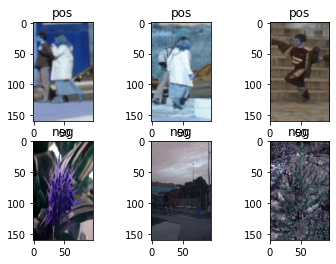

In [22]:

y_predict_pos = clf.predict(Test_pos_fds[0:3])



y_predict_neg = clf.predict(Test_neg_fds[0:3])


f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(TEPosImg[0])
axarr[0,0].set_title(y_predict_pos[0])
axarr[0,1].imshow(TEPosImg[1])
axarr[0,1].set_title(y_predict_pos[1])
axarr[0,2].imshow(TEPosImg[2])
axarr[0,2].set_title(y_predict_pos[2])
axarr[1,0].imshow(TENegImg[0])
axarr[1,0].set_title(y_predict_neg[0])
axarr[1,1].imshow(TENegImg[1])
axarr[1,1].set_title(y_predict_neg[1])
axarr[1,2].imshow(TENegImg[2])
axarr[1,2].set_title(y_predict_neg[2])
plt.show()


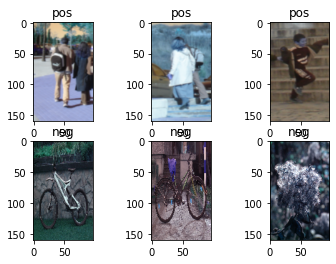

In [23]:
y_predict_pos = rf.predict(Test_pos_fds[3:6])



y_predict_neg = clf.predict(Test_neg_fds[3:6])


f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(TEPosImg[3])
axarr[0,0].set_title(y_predict_pos[0])
axarr[0,1].imshow(TEPosImg[4])
axarr[0,1].set_title(y_predict_pos[1])
axarr[0,2].imshow(TEPosImg[5])
axarr[0,2].set_title(y_predict_pos[2])
axarr[1,0].imshow(TENegImg[3])
axarr[1,0].set_title(y_predict_neg[0])
axarr[1,1].imshow(TENegImg[4])
axarr[1,1].set_title(y_predict_neg[1])
axarr[1,2].imshow(TENegImg[5])
axarr[1,2].set_title(y_predict_neg[2])
plt.show()
